for sigma=0.00, the ratio showing how many x were accepted: 1.0000


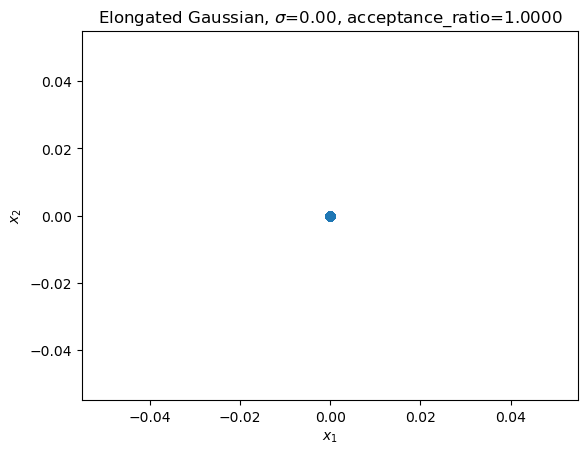

for sigma=0.11, the ratio showing how many x were accepted: 0.4298


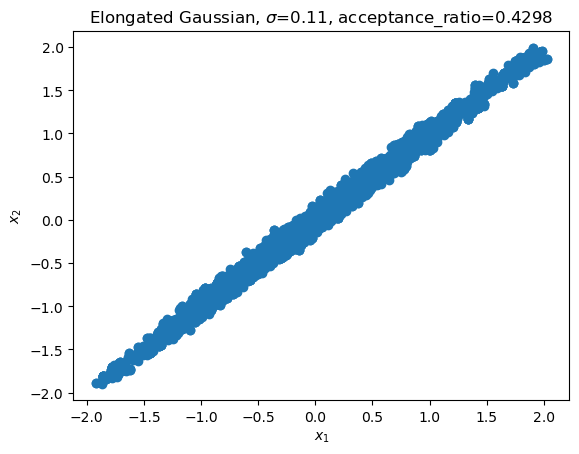

for sigma=0.22, the ratio showing how many x were accepted: 0.2472


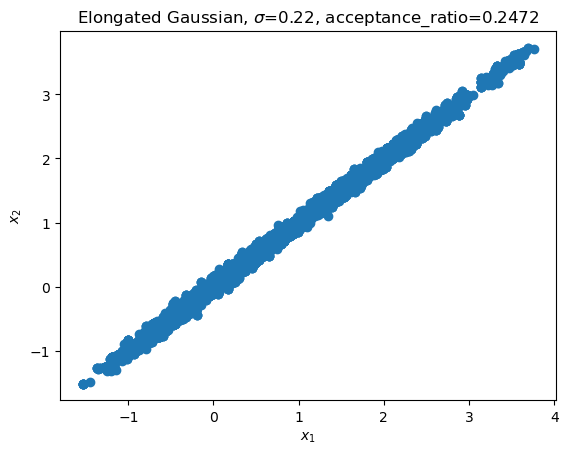

for sigma=0.33, the ratio showing how many x were accepted: 0.1554


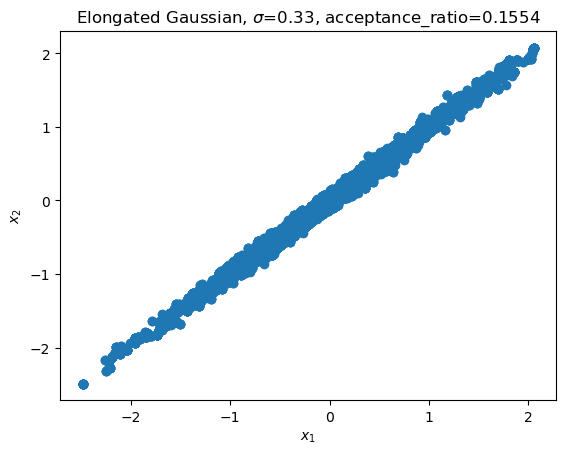

for sigma=0.44, the ratio showing how many x were accepted: 0.1269


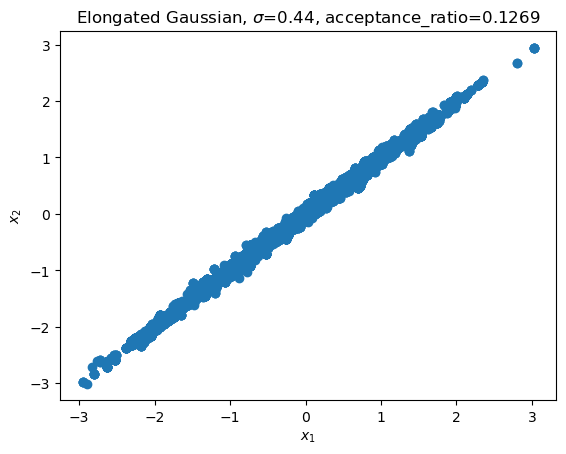

for sigma=0.56, the ratio showing how many x were accepted: 0.0986


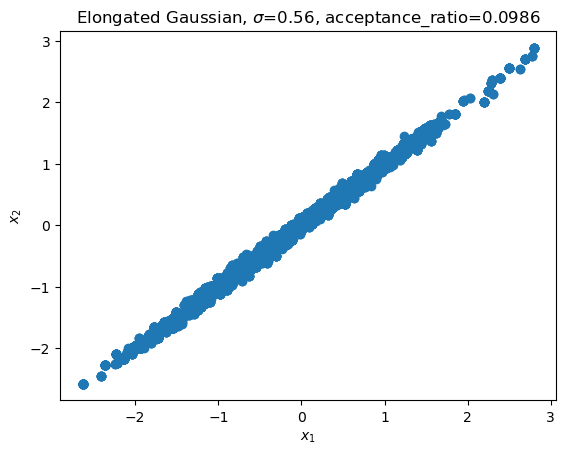

for sigma=0.67, the ratio showing how many x were accepted: 0.0770


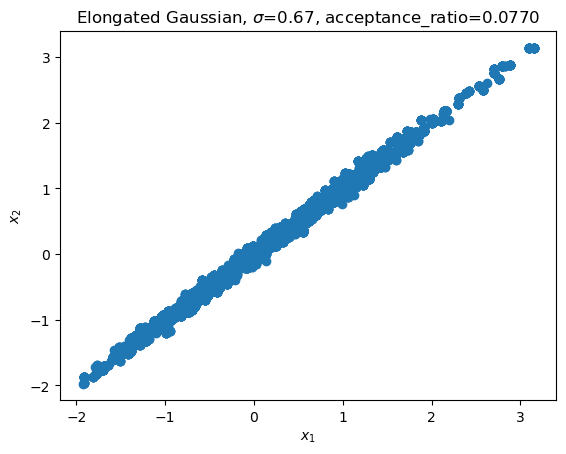

for sigma=0.78, the ratio showing how many x were accepted: 0.0665


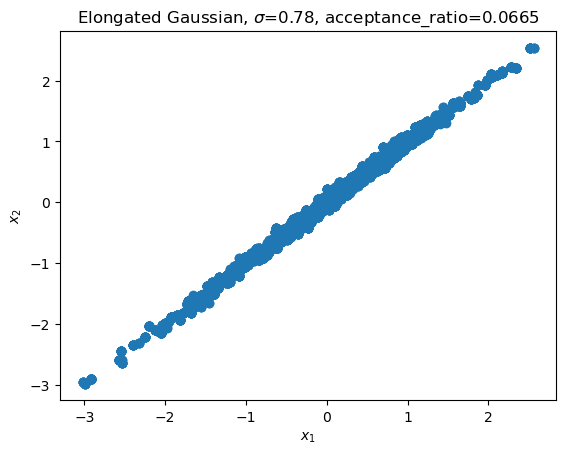

for sigma=0.89, the ratio showing how many x were accepted: 0.0577


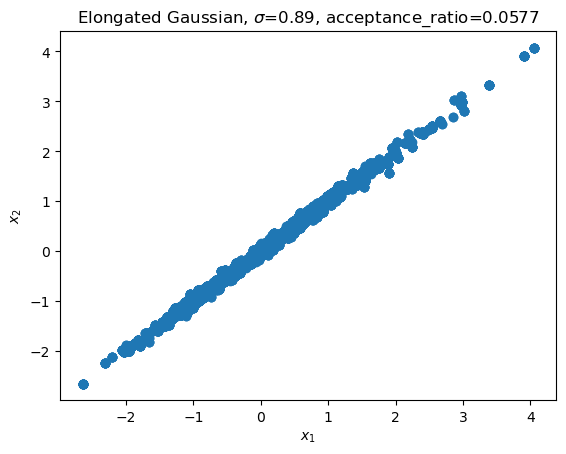

for sigma=1.00, the ratio showing how many x were accepted: 0.0492


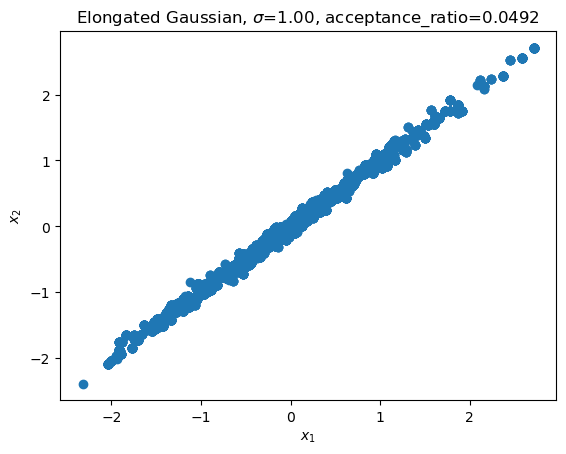

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.01, and leapfrog steps 5


100%|██████████| 999/999 [01:26<00:00, 11.58it/s]


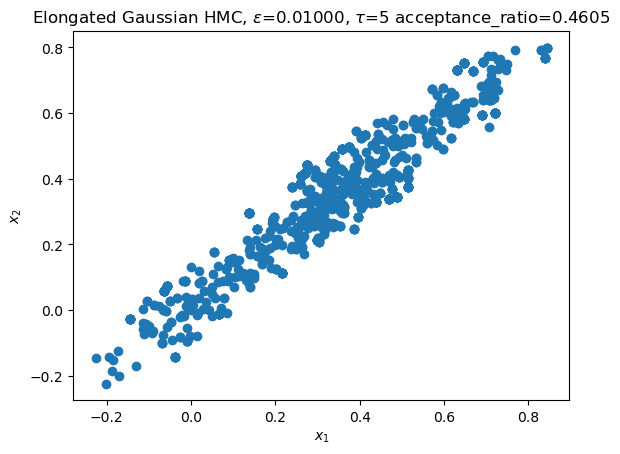

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.01, and leapfrog steps 10


100%|██████████| 999/999 [01:16<00:00, 13.12it/s]


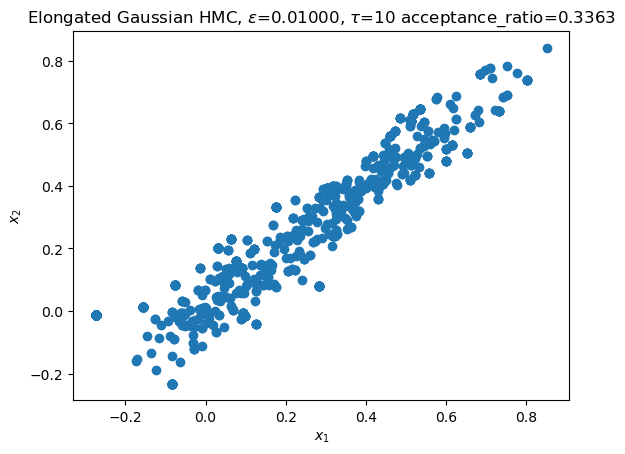

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.01, and leapfrog steps 25


100%|██████████| 999/999 [01:20<00:00, 12.48it/s]


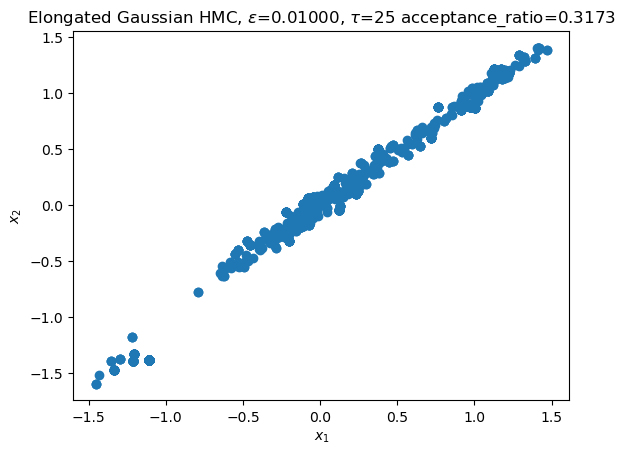

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.01, and leapfrog steps 50


100%|██████████| 999/999 [01:28<00:00, 11.34it/s]


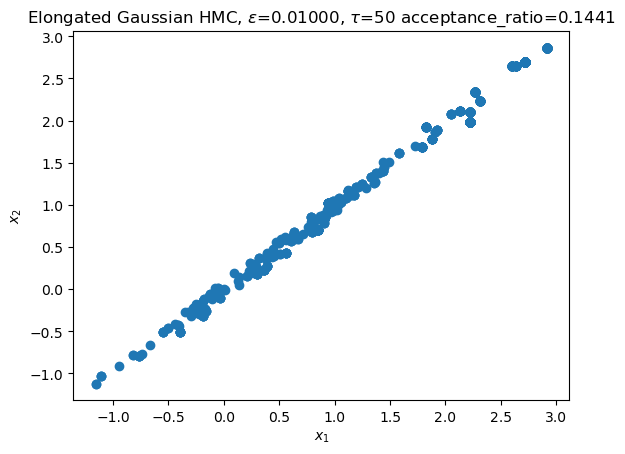

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.01, and leapfrog steps 100


100%|██████████| 999/999 [01:27<00:00, 11.38it/s]


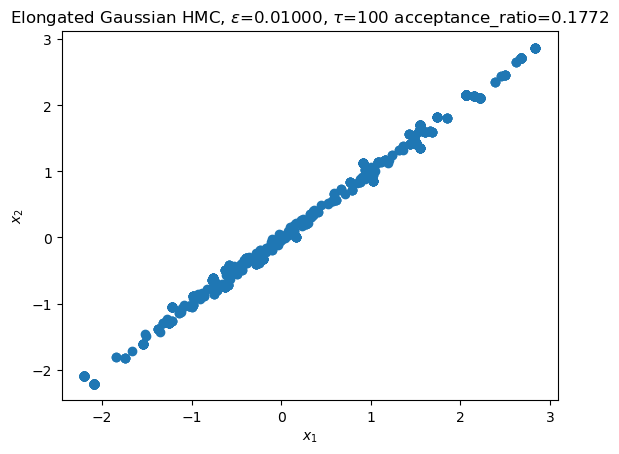

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.001, and leapfrog steps 5


100%|██████████| 999/999 [01:39<00:00, 10.04it/s]


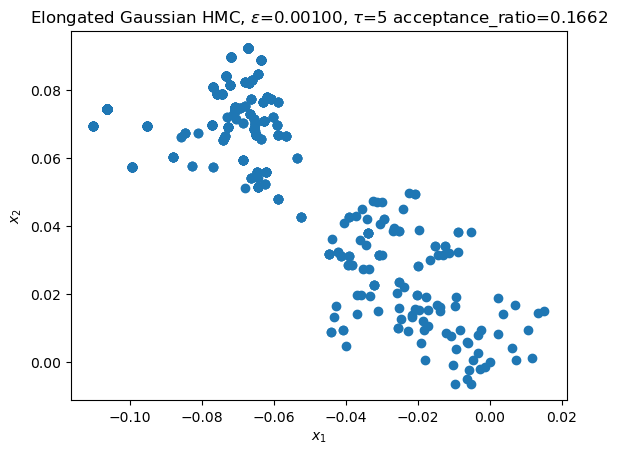

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.001, and leapfrog steps 10


100%|██████████| 999/999 [01:49<00:00,  9.10it/s]


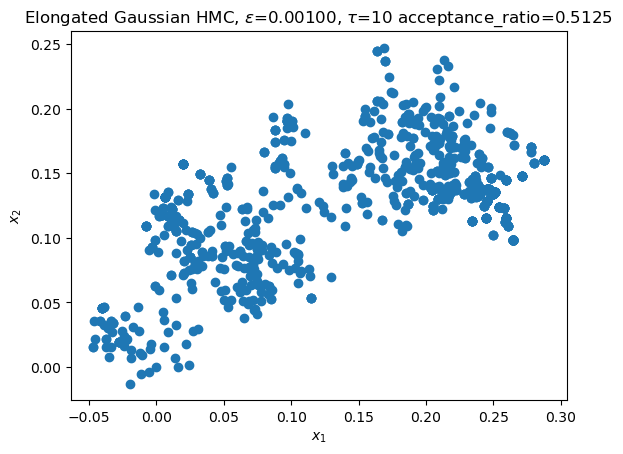

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.001, and leapfrog steps 25


100%|██████████| 999/999 [02:46<00:00,  6.01it/s]


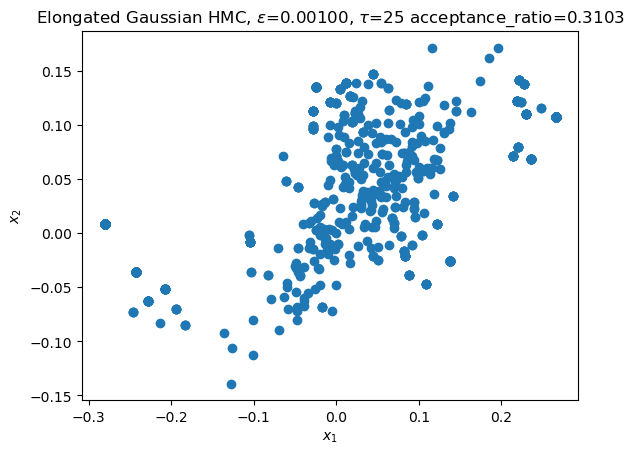

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.001, and leapfrog steps 50


100%|██████████| 999/999 [01:57<00:00,  8.53it/s]


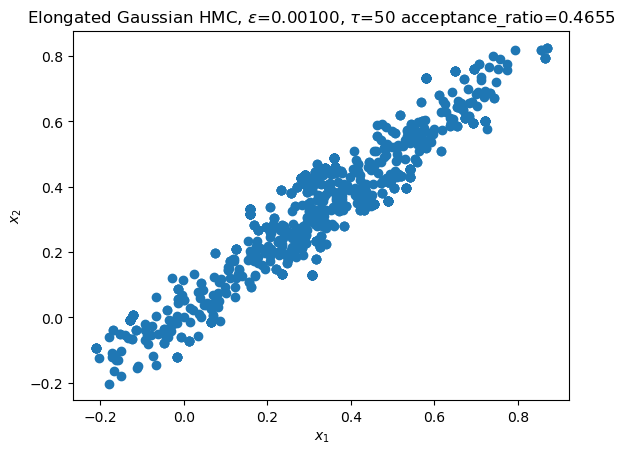

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.001, and leapfrog steps 100


100%|██████████| 999/999 [01:41<00:00,  9.87it/s]


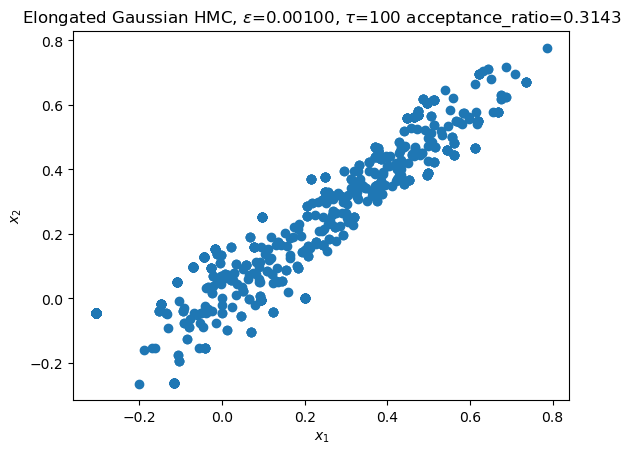

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.0001, and leapfrog steps 5


100%|██████████| 999/999 [01:43<00:00,  9.62it/s]


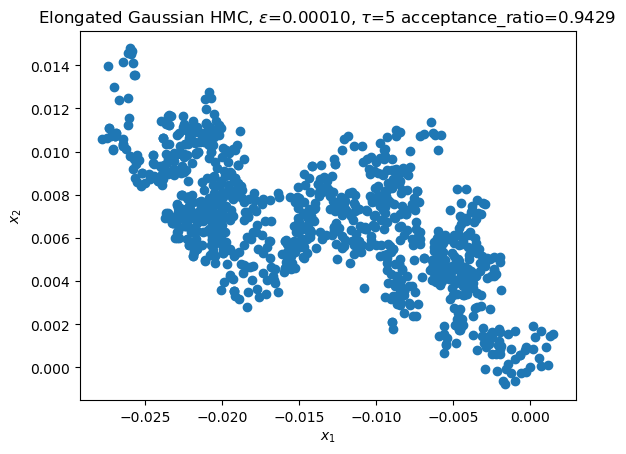

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.0001, and leapfrog steps 10


100%|██████████| 999/999 [01:40<00:00,  9.98it/s]


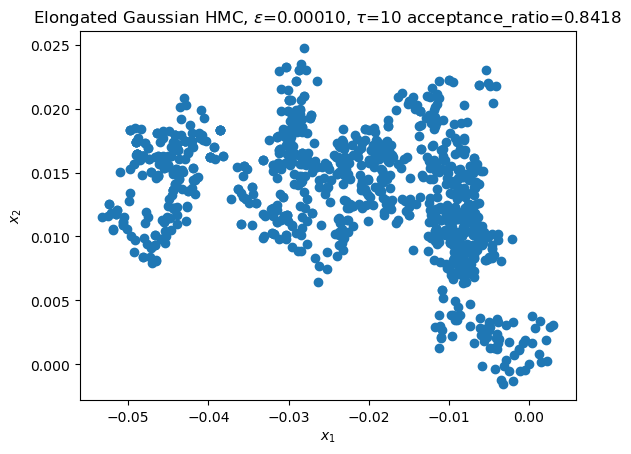

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.0001, and leapfrog steps 25


100%|██████████| 999/999 [01:36<00:00, 10.34it/s]


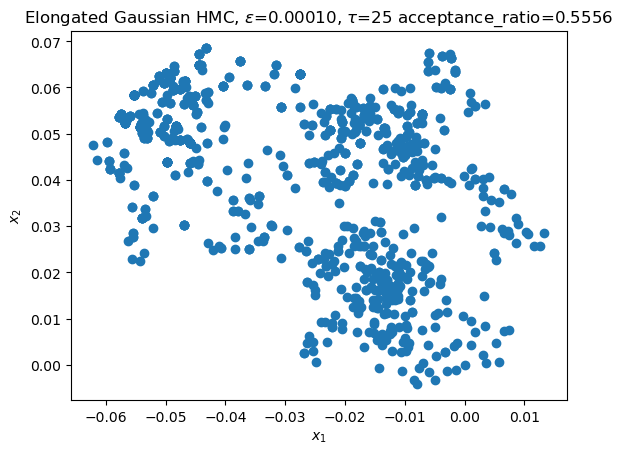

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.0001, and leapfrog steps 50


100%|██████████| 999/999 [01:41<00:00,  9.86it/s]


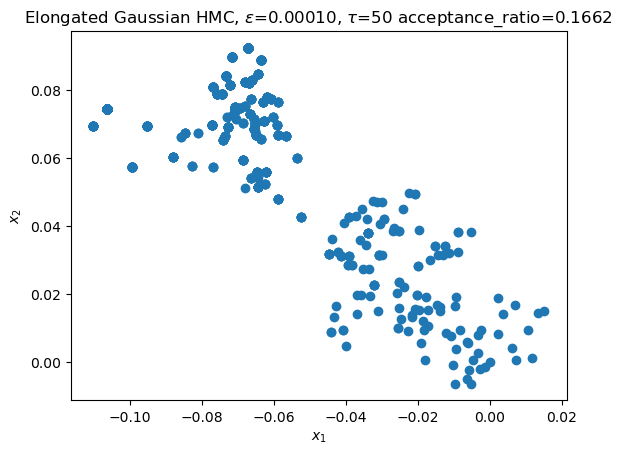

Running Hamiltonian Monte Carlo sampling run with: 1000 samples, leapfrog step size 0.0001, and leapfrog steps 100


100%|██████████| 999/999 [01:49<00:00,  9.16it/s]


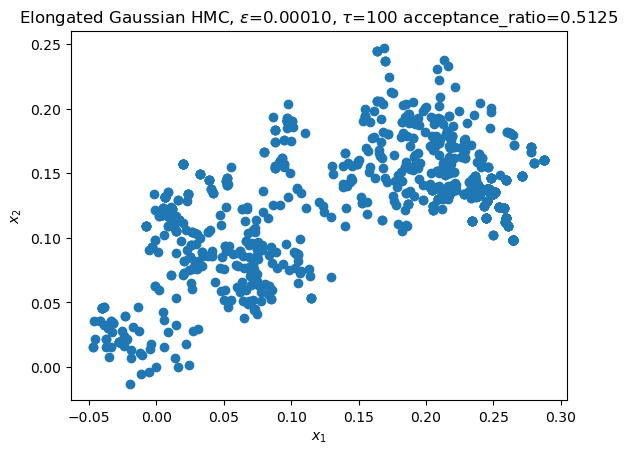

ValueError: x and y must be the same size

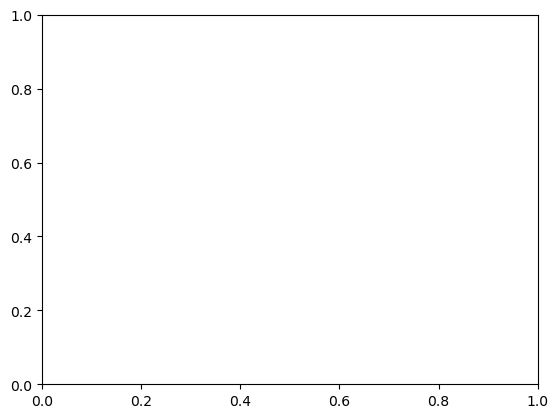

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from metropolis_hastings import metropolis_hastings
from hamiltonian_mc import hmc

A = np.array([[250.25, -249.75], [-249.75, 250.25]])

def calc_E(x):
    return 1 / 2 * x.T @ A @ x

# proposal function that is proportional to the one we want to sample Q(x)
def proportional_function_exponent(x, *args):
    return np.exp(-calc_E(x))

"""
For Metropolis Hastings:
- Study the acceptance ratio
- Report the optimal values
- Compute the mean, and compare the accuracy as a function of the computation time
"""
num_iterations = 10000
# where to get these from? or they're completely random?
x_init = np.array([0., 0.])
sigmas = np.linspace(0, 1, 10)
MHMC_runtimes = []
MHMC_means    = []
MHMC_accepts  = []
for sigma in sigmas:

    start = time.time()
    X, acceptance_ratio = metropolis_hastings(num_iterations, x_init, sigma, proportional_function_exponent)
    end = time.time()
    runtime = end - start
    MHMC_runtimes.append(runtime)
    MHMC_accepts.append(acceptance_ratio)

    mean = np.mean(X, axis=0)
    MHMC_means.append(mean)

    print(f"for sigma={sigma:.2f}, the ratio showing how many x were accepted: {acceptance_ratio:.4f}")
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(rf'Elongated Gaussian, $\sigma$={sigma:.2f}, acceptance_ratio={acceptance_ratio:.4f}')

    # plt.savefig(f'elongated_gaussian_{sigma}.png')
    plt.show()

"""
For Hamiltonian Monte Carlo:
- Study the acceptance ratio
- and how well the sampler covers the entire distribution,
    - by varying the step size epsilon
    - and number of leap frog steps
- report the optimal values
- compute the mean and compare the accuracy as a function of the computation time
"""

HMC_runtimes = []
HMC_means    = []
HMC_accepts  = []

epss = [0.01, 0.001, 0.0001]
taus = [5, 10, 25, 50, 100]
num_iterations = 1000

for eps in epss:
    for tau in taus:
        print(f"Running Hamiltonian Monte Carlo sampling run with: {num_iterations} samples, leapfrog step size {eps}, and leapfrog steps {tau}")
        start = time.time()
        y, accepts = hmc(x_init, calc_E, num_iterations, eps, tau)
        end = time.time()
        runtime = end - start
        HMC_runtimes.append(runtime)
        HMC_accepts.append(accepts[-1])

        # NO BURN-IN!
        mean = np.mean(y, axis=0)
        HMC_means.append(mean)

        plt.scatter(y[:, 0], y[:, 1])
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.title(rf'Elongated Gaussian HMC, $\epsilon$={eps:.5f}, $\tau$={tau} acceptance_ratio={accepts[-1]:.4f}')
        plt.show()

MHMC_mean_errors = np.linalg.norm(np.asarray(MHMC_means)-np.zeros(2))
HMC_mean_errors  = np.linalg.norm(np.asarray(HMC_means)-np.zeros(2))

# compare the accuracy as a function of the computation time
plt.scatter(MHMC_runtimes, MHMC_mean_errors, linestyle = "o", label="Metropolis Hastings", colour = "c")
plt.scatter(HMC_runtimes, HMC_mean_errors, linestyle="o", label="Hamiltonian Monte Carlo", colour = "m")
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error")  
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))

sns.swarmplot(data=[MHMC_accepts, HMC_accepts], orient="v")
plt.xticks([0,1], ["Metropolis Hastings", "Hamiltonian"])
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by Sampler")

In [ ]:
MHMC_mean_errors.shape

()

In [ ]:
MHMC.means

NameError: name 'MHMC' is not defined

In [ ]:
MHMC_means

[array([0., 0.]),
 array([-0.00060737,  0.00212497]),
 array([0.75970126, 0.75843884]),
 array([0.05442229, 0.05570007]),
 array([-0.0933745 , -0.09134945]),
 array([-0.1351891 , -0.13882701]),
 array([0.24387387, 0.24295486]),
 array([-0.01785392, -0.020262  ]),
 array([0.07873557, 0.08039744]),
 array([-0.07486493, -0.07404647])]

In [ ]:
MHMC_means.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
MHMC_mean_errors

1.1644907494120211

In [ ]:
MHMC_mean_errors = (np.asarray(MHMC_means) - np.zeros((len(MHMC_means), 2)))**2
HMC_mean_errors  = (np.asarray(HMC_means) - np.zeros((len(HMC_means), 2)))**2



In [ ]:
MHMC_mean_errors

array([[0.00000000e+00, 0.00000000e+00],
       [3.68895580e-07, 4.51548178e-06],
       [5.77145999e-01, 5.75229469e-01],
       [2.96178606e-03, 3.10249812e-03],
       [8.71879698e-03, 8.34472191e-03],
       [1.82760926e-02, 1.92729396e-02],
       [5.94744642e-02, 5.90270654e-02],
       [3.18762334e-04, 4.10548467e-04],
       [6.19929044e-03, 6.46374905e-03],
       [5.60475769e-03, 5.48288044e-03]])

ValueError: x and y must be the same size

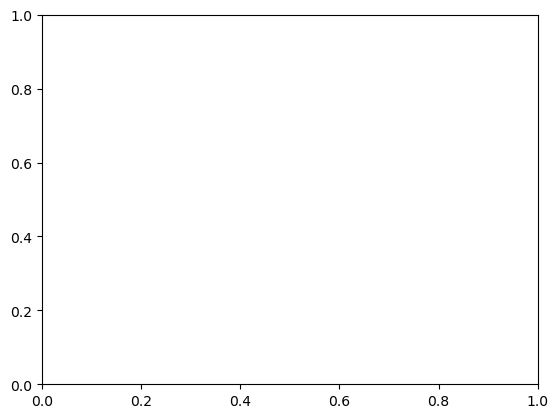

In [ ]:
plt.scatter(MHMC_runtimes, MHMC_mean_errors, linestyle = "o", label="Metropolis Hastings", colour = "c")

AttributeError: PathCollection.set() got an unexpected keyword argument 'colour'

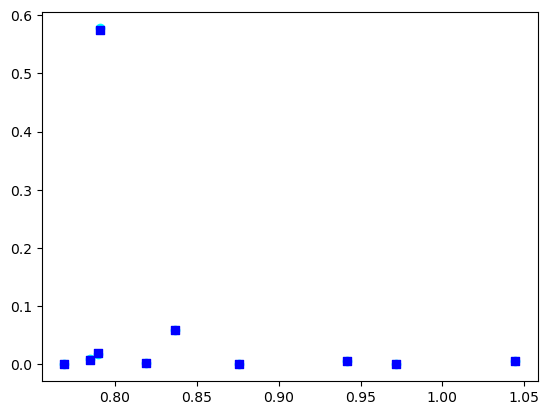

In [ ]:
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 0], marker='o', label="MH - dim 1", color='cyan')
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 1], marker='s', label="MH - dim 2", color='blue')
plt.scatter(HMC_runtimes, HMC_mean_errors[:,0], marker="o", label="Hamiltonian Monte Carlo", colour = "magenta")
plt.scatter(HMC_runtimes, HMC_mean_errors[:,1], marker="s", label="Hamiltonian Monte Carlo", colour = "yellow")
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error")  
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()



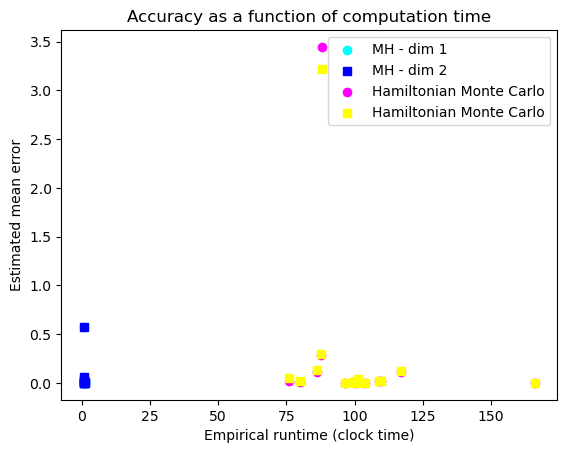

In [ ]:
# compare the accuracy as a function of the computation time
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 0], marker='o', label="MH - dim 1", color='cyan')
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 1], marker='s', label="MH - dim 2", color='blue')
plt.scatter(HMC_runtimes, HMC_mean_errors[:,0], marker="o", label="Hamiltonian Monte Carlo", color = "magenta")
plt.scatter(HMC_runtimes, HMC_mean_errors[:,1], marker="s", label="Hamiltonian Monte Carlo", color = "yellow")
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error")  
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()



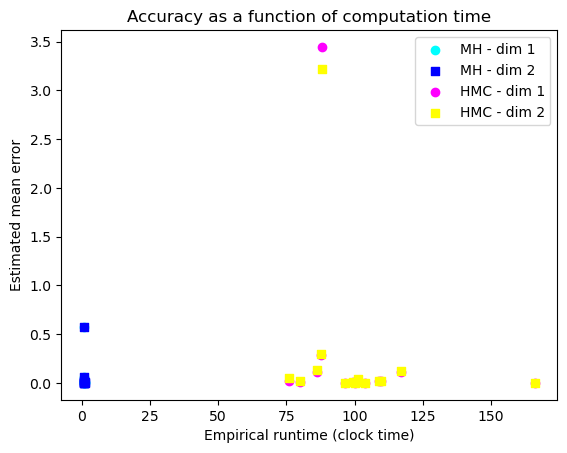

In [ ]:
# compare the accuracy as a function of the computation time
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 0], marker='o', label="MH - dim 1", color='cyan')
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 1], marker='s', label="MH - dim 2", color='blue')
plt.scatter(HMC_runtimes, HMC_mean_errors[:,0], marker="o", label="HMC - dim 1", color = "magenta")
plt.scatter(HMC_runtimes, HMC_mean_errors[:,1], marker="s", label="HMC - dim 2", color = "yellow")
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error")  
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()



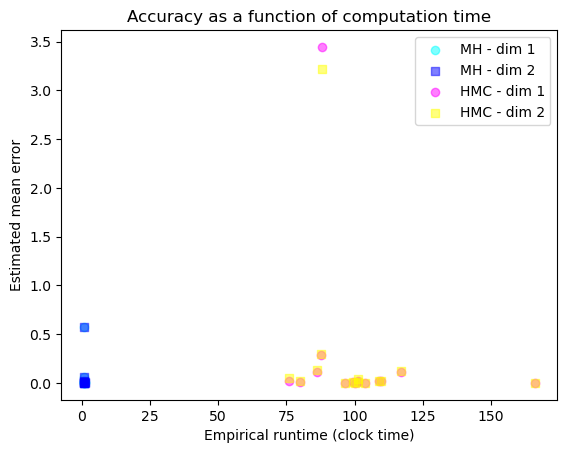

In [ ]:

# compare the accuracy as a function of the computation time
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 0], marker='o', label="MH - dim 1", color='cyan', alpha = 0.5)
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 1], marker='s', label="MH - dim 2", color='blue', alpha = 0.5)
plt.scatter(HMC_runtimes, HMC_mean_errors[:,0], marker="o", label="HMC - dim 1", color = "magenta", alpha = 0.5)
plt.scatter(HMC_runtimes, HMC_mean_errors[:,1], marker="s", label="HMC - dim 2", color = "yellow", alpha = 0.5)
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error")  
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()



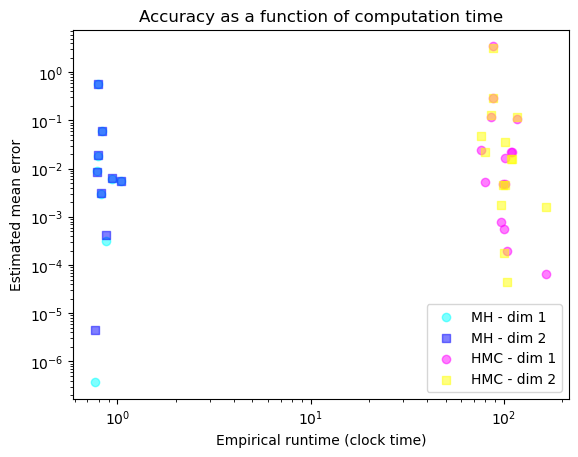

In [ ]:
# compare the accuracy as a function of the computation time
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 0], marker='o', label="MH - dim 1", color='cyan', alpha = 0.5)
plt.scatter(MHMC_runtimes, MHMC_mean_errors[:, 1], marker='s', label="MH - dim 2", color='blue', alpha = 0.5)
plt.scatter(HMC_runtimes, HMC_mean_errors[:,0], marker="o", label="HMC - dim 1", color = "magenta", alpha = 0.5)
plt.scatter(HMC_runtimes, HMC_mean_errors[:,1], marker="s", label="HMC - dim 2", color = "yellow", alpha = 0.5)
plt.xlabel("Empirical runtime (clock time)")
plt.ylabel("Estimated mean error") 
plt.xscale("log")
plt.yscale("log")
plt.title("Accuracy as a function of computation time")  
plt.legend()
plt.show()



Text(0.5, 1.0, 'Distribution of Acceptance Rates by Sampler')

<Figure size 640x480 with 0 Axes>

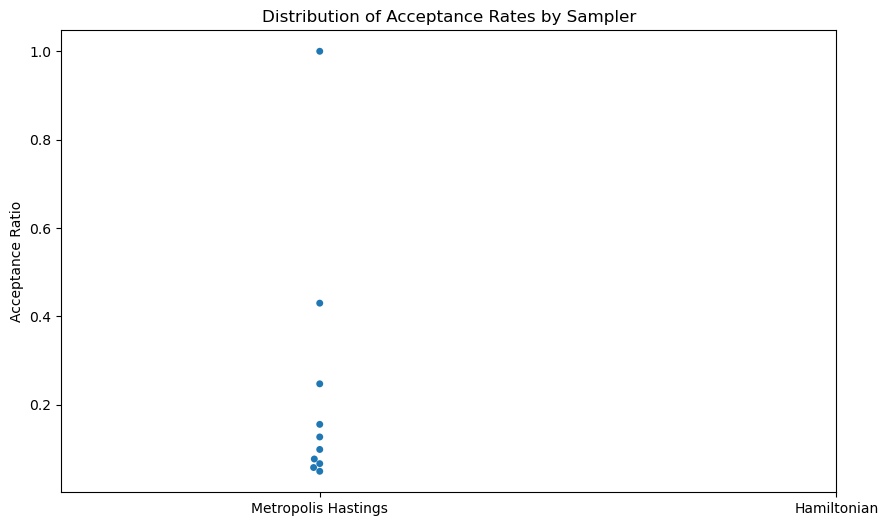

In [ ]:
plt.clf()
plt.figure(figsize=(10,6))

sns.swarmplot(data=[MHMC_accepts, HMC_accepts], orient="v")
plt.xticks([0,1], ["Metropolis Hastings", "Hamiltonian"])
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by Sampler")



In [ ]:

sns.swarmplot(data=[MHMC_accepts, HMC_accepts])
plt.xticks([0,1], ["Metropolis Hastings", "Hamiltonian"])
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by



SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-17-a9011c046531>, line 4)

Text(0.5, 1.0, 'Distribution of Acceptance Rates by Sampler')

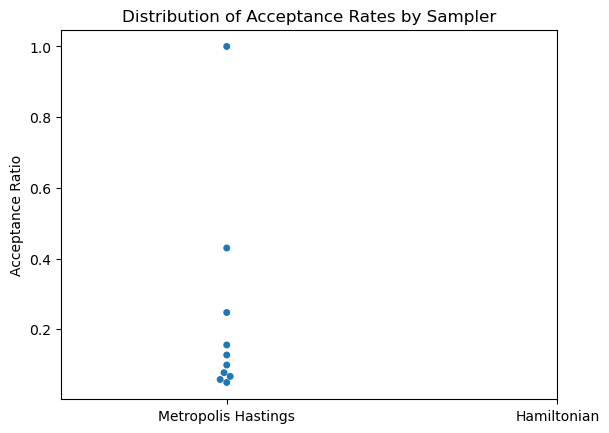

In [ ]:
sns.swarmplot(data=[MHMC_accepts, HMC_accepts])
plt.xticks([0,1], ["Metropolis Hastings", "Hamiltonian"])
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by Sampler")



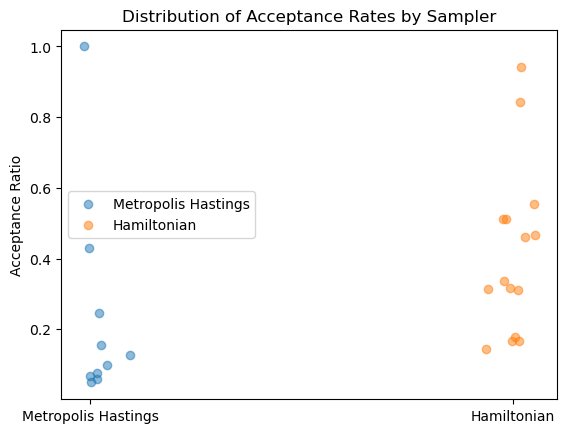

In [ ]:
x_mh = np.random.normal(0, 0.04, size=len(MHMC_accepts))
x_hmc = np.random.normal(1, 0.04, size=len(HMC_accepts))

plt.scatter(x_mh, MHMC_accepts, alpha=0.5, label='Metropolis Hastings')
plt.scatter(x_hmc, HMC_accepts, alpha=0.5, label='Hamiltonian')
plt.xticks([0,1], ["Metropolis Hastings", "Hamiltonian"])
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by Sampler")
plt.legend()




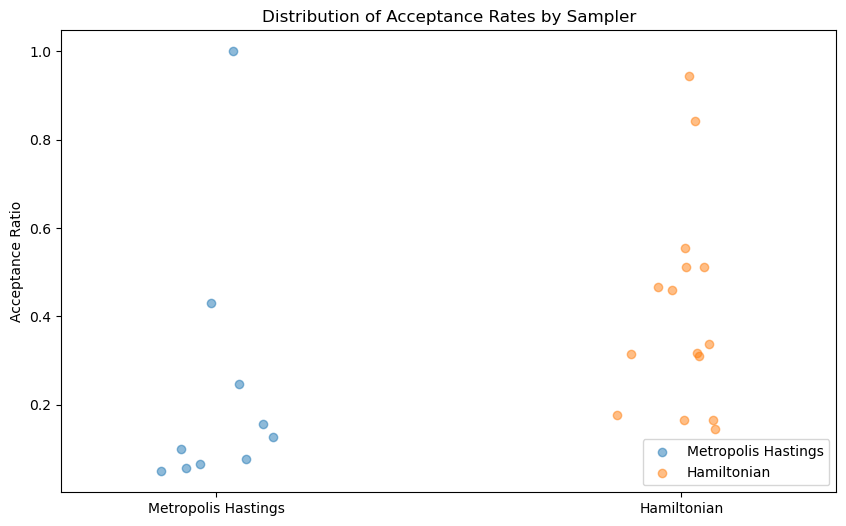

In [ ]:
plt.figure(figsize=(10,6))
# Add small random jitter to x-coordinates to spread points
x_mh = np.random.normal(-0.3, 0.04, size=len(MHMC_accepts))  # Shifted left
x_hmc = np.random.normal(0.3, 0.04, size=len(HMC_accepts))   # Shifted right

plt.scatter(x_mh, MHMC_accepts, alpha=0.5, label='Metropolis Hastings')
plt.scatter(x_hmc, HMC_accepts, alpha=0.5, label='Hamiltonian')
plt.xticks([-0.3, 0.3], ["Metropolis Hastings", "Hamiltonian"])  # Adjust tick positions
plt.xlim(-0.5, 0.5)  # Set x-axis limits to reduce empty space
plt.ylabel("Acceptance Ratio")
plt.title("Distribution of Acceptance Rates by Sampler")
plt.legend()

